# Pymaceuticals Inc.
---

### Analysis

After analyzing the data I find that the most successful drug regimens out of the four we analyzed for final tumor volume (Capomulin, Ramicane, Infubinol, and Ceftamin) were Capomulin and Ramicane. They were the only drug regimens that had a final tumor volume under the starting tumor volume of 45(mm3). Infubinol did have one mice whose final tumor volume was below 45 but it was considered an outlier. 

When looking at the correlation between the average tumor volume and mouse weight for the Capomulin regimen, we can see that there is a high positive correlation of 0.84. This means that a higher mouse weight leads to a higher tumor volume. 

After looking at other factors given I found that the sex, age, and metastatic site count has a neglible correlation to the average tumor size. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
results_df = pd.merge(mouse_metadata, study_results,  how="left")
# Display the data table for preview
results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
count_mice = len(results_df['Mouse ID'].unique())
count_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = results_df.duplicated()
duplicated_df = pd.DataFrame({'Duplicated':duplicates})
duplicated_mouse = results_df.loc[duplicated_df['Duplicated'] == True]['Mouse ID'].values
duplicated_mouse = duplicated_mouse[0]
duplicated_mouse

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
results_df.loc[results_df['Mouse ID'] == duplicated_mouse]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = results_df.loc[results_df['Mouse ID'] != duplicated_mouse]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
count_mice = len(clean_df['Mouse ID'].unique())
count_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
mean = summary_df.mean()
median = summary_df.median()
var = summary_df.var()
std = summary_df.std()
sem = summary_df.sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({'Mean Tumor Volume': mean, 'Median Tumor Volume': median, 'Tumor Volume Variance': var,
                           'Tumor Volume Standard Deviation': std, 'Tumor Volume Standard Error': sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_df = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
# Using the aggregation method, produce the same summary statistics in a single line.
summary_df.describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number of Timepoints for each Drug Regimen')

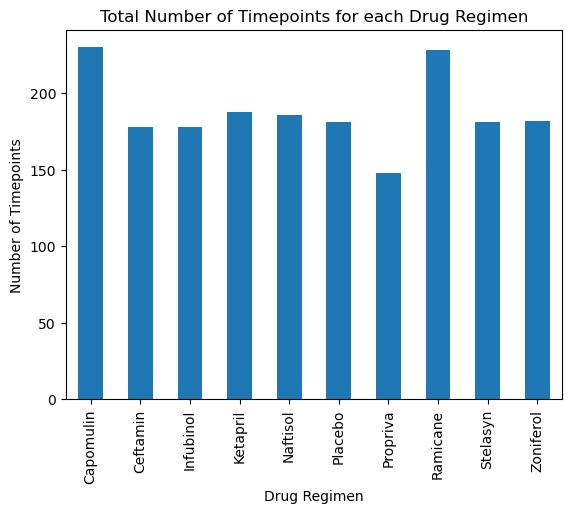

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_group = clean_df.groupby(['Drug Regimen']).count()['Timepoint']
drg_plot = drug_regimen_group.plot(kind = 'bar')
drg_plot.set_xlabel('Drug Regimen')
drg_plot.set_ylabel('Number of Timepoints')
drg_plot.set_title('Total Number of Timepoints for each Drug Regimen')


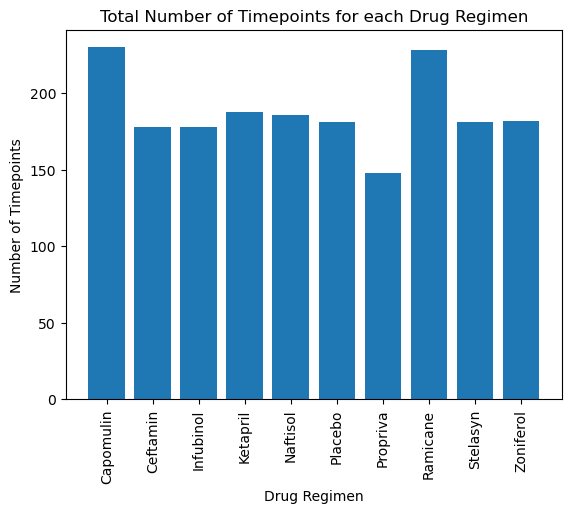

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
x_axis = drug_regimen_group.index.values
plt.bar(x_axis,drug_regimen_group)
plt.xticks(rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Total Number of Timepoints for each Drug Regimen')
plt.show()


<Axes: title={'center': 'Female vs Male Mice Tested'}, ylabel='Sex'>

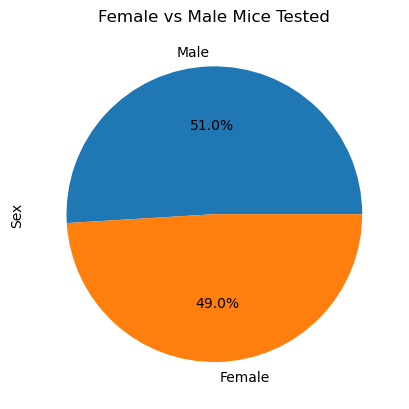

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df['Sex'].value_counts().plot(kind = 'pie',autopct="%1.1f%%",title = 'Female vs Male Mice Tested')

Text(0.5, 1.0, 'Female vs Male Mice Tested')

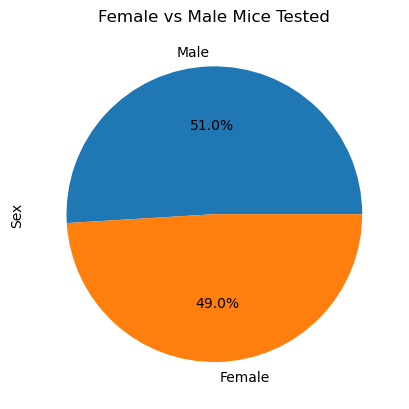

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(clean_df['Sex'].value_counts(),labels = ['Male', 'Female'],autopct="%1.1f%%")
plt.ylabel('Sex')
plt.title('Female vs Male Mice Tested')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
four_regimens_df = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin')|
                          (clean_df['Drug Regimen'] =='Ramicane')|
                          (clean_df['Drug Regimen'] =='Infubinol')|
                          (clean_df['Drug Regimen'] =='Ceftamin')]
max_timepoint = four_regimens_df.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint = pd.DataFrame({'Max Timepoint':max_timepoint})
max_timepoint


,Max Timepoint
Mouse ID,
a203,45
a251,45
a275,45
a411,45
a444,45
...,...
y769,45
y793,45
y865,45


In [14]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_df = pd.merge(max_timepoint,four_regimens_df,on ='Mouse ID',how = 'left')
max_df

,Mouse ID,Max Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...,...
809,z581,45,Infubinol,Female,24,25,25,54.316407,2
810,z581,45,Infubinol,Female,24,25,30,56.286750,2
811,z581,45,Infubinol,Female,24,25,35,58.628399,3
812,z581,45,Infubinol,Female,24,25,40,60.053740,3


In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_df = max_df.loc[(max_df['Timepoint'] == max_df['Max Timepoint'])]
final_tumor_df = final_tumor_df.rename(columns = {'Timepoint':'Final Timepoint', 'Tumor Volume (mm3)': 'Final Tumor Vol (mm3)'})
final_tumor_df

,Mouse ID,Max Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Final Timepoint,Final Tumor Vol (mm3),Metastatic Sites
9,a203,45,Infubinol,Female,20,23,45,67.973419,2
19,a251,45,Infubinol,Female,21,25,45,65.525743,1
29,a275,45,Ceftamin,Female,20,28,45,62.999356,3
39,a411,45,Ramicane,Male,3,22,45,38.407618,1
49,a444,45,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...,...
773,y769,45,Ceftamin,Female,6,27,45,68.594745,4
783,y793,45,Capomulin,Male,17,17,45,31.896238,2
793,y865,45,Ceftamin,Male,23,26,45,64.729837,3
803,z578,45,Ramicane,Male,11,16,45,30.638696,0


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = final_tumor_df['Drug Regimen'].unique() 
final_data = []
for drug in drug_regimens:
# Create empty list to fill with tumor vol data (for plotting)
    final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug]['Final Tumor Vol (mm3)']
    
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#     final_tumor_vol_df = pd.DataFrame({'Final Tumor Vol': final_tumor_vol})
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
# Locate the rows which contain mice on each drug and get the tumor volumes
    
    
# add subset 
 
    
# Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = {'Mouse ID': [], 'Final Tumor Vol (mm3)': []}
    for tumor in final_tumor_vol:
        
        if (tumor < lower_bound)|(tumor > upper_bound):
            outliers['Final Tumor Vol (mm3)'].append(tumor)
            outliers['Mouse ID'].append(final_tumor_df.loc[final_tumor_df['Final Tumor Vol (mm3)'] == tumor]['Mouse ID'].tolist())
    
    if outliers['Mouse ID'] == []:
        print(f'{drug}\'s potential outliers: None')
    else:
        print(f'{drug}\'s potential outliers: {outliers}')
   
    final_data.append(final_tumor_vol)


Infubinol's potential outliers: {'Mouse ID': [['c326']], 'Final Tumor Vol (mm3)': [36.3213458]}
Ceftamin's potential outliers: None
Ramicane's potential outliers: None
Capomulin's potential outliers: None


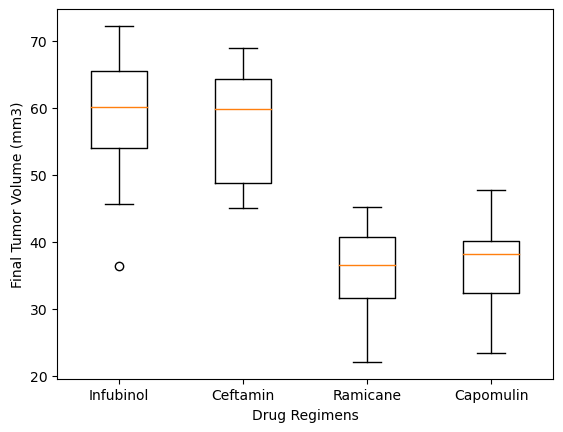

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(final_data)
plt.xticks([1, 2, 3,4], drug_regimens)
plt.xlabel('Drug Regimens')
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment for mouse s185')

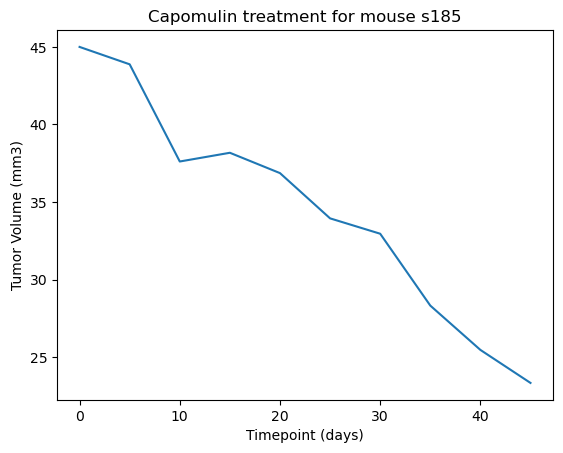

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin'].reset_index(drop = True)
treated_mouse = capomulin_df._get_value(0,'Mouse ID')
plt.plot(capomulin_df.loc[capomulin_df['Mouse ID'] == treated_mouse]['Timepoint'],
         capomulin_df.loc[capomulin_df['Mouse ID'] == treated_mouse]['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment for mouse {treated_mouse}')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

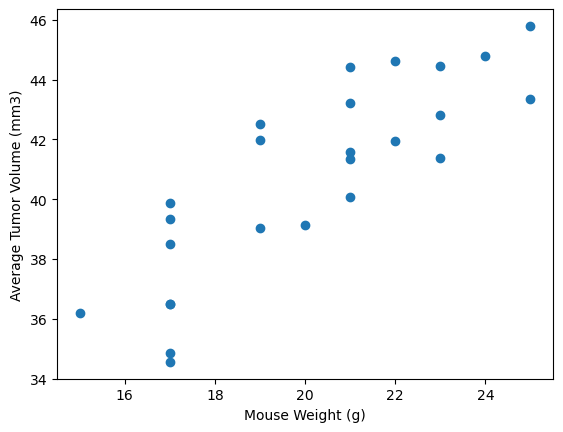

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# 
avg_tumor_volume = capomulin_df.groupby(capomulin_df['Mouse ID'])['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_df.groupby(capomulin_df['Mouse ID'])['Weight (g)'].mean()
plt.scatter(mouse_weight,avg_tumor_volume)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation bewteen mouse weight and average tumor volume is: 0.8419363424694721


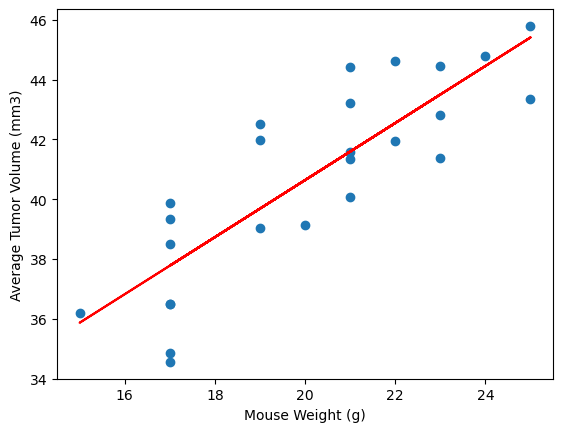

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight,avg_tumor_volume)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation bewteen mouse weight and average tumor volume is: {rvalue}")

The correlation bewteen mouse age and average tumor volume is: 0.015190045310616402


,count,mean,std,min,25%,50%,75%,max
Metastatic Sites,,,,,,,,
0,118.0,42.098476,4.430051,28.167397,39.282807,44.021561,45.000000,47.373423
1,67.0,39.479840,5.529402,23.343598,36.591109,40.171920,43.143040,48.158209
2,38.0,39.639961,4.074911,31.475411,36.028365,40.183254,41.545951,48.070452
3,7.0,33.761781,3.524322,31.023923,32.091099,32.680655,33.481341,41.483008


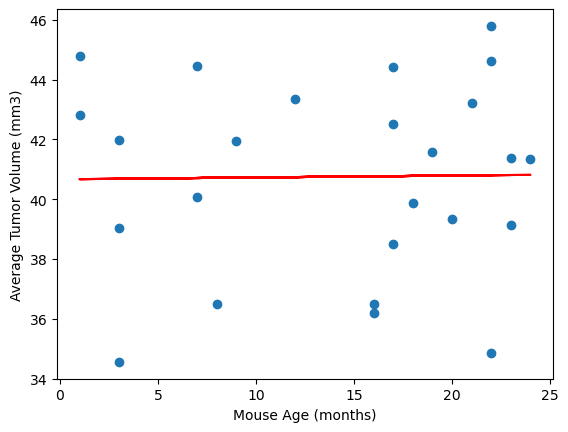

In [21]:
# Looking at the correlation between the average tumor volume and other factors. 
avg_tumor_volume = capomulin_df.groupby(capomulin_df['Mouse ID'])['Tumor Volume (mm3)'].mean()
mouse_age = capomulin_df.groupby(capomulin_df['Mouse ID'])['Age_months'].mean()
# plt.scatter(mouse_weight,avg_tumor_volume)
# plt.xlabel('Mouse Weight (g)')
# plt.ylabel('Average Tumor Volume (mm3)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_age, avg_tumor_volume)
regress_values = mouse_age * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_age,avg_tumor_volume)
plt.plot(mouse_age,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Mouse Age (months)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation bewteen mouse age and average tumor volume is: {rvalue}")
avg_tumor_vol_sex = capomulin_df.groupby(capomulin_df['Sex'])['Tumor Volume (mm3)'].describe()
avg_tumor_vol_meta = capomulin_df.groupby(capomulin_df['Metastatic Sites'])['Tumor Volume (mm3)'].describe()
avg_tumor_vol_sex
avg_tumor_vol_meta